<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Nikoo Moradi

**Student ID**: 400101934



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [187]:
## Import necessary libraries here ##

import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso






**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [188]:
## Write your code here ##

df = pd.read_csv('/content/Boston.csv')
print("Shape of the dataset:", df.shape)
print("\n\nFirst row of the dataset:")
print(df.head(1))
print("\n\nDataset information:")
print(df.info())
print("\n\nColumns in the dataset:")
print(df.columns)
feature_names = df.drop('MEDV', axis=1).columns
print(feature_names)



Shape of the dataset: (506, 14)


First row of the dataset:
      CRIM    ZN  INDUS  CHAS     NX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296.0     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    flo

Our dataset contains 14 features and 506 samples.
### Features of the Boston Dataset

The dataset typically includes several explanatory variables (features) that describe aspects of residential homes in Boston, such as:

*   **CRIM**: Per capita crime rate by town
*   **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
*   **INDUS**: Proportion of non-retail business acres per town
*   **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   **NOX**: Nitric oxides concentration (parts per 10 million)
*   **RM**: Average number of rooms per dwelling
*   **AGE**: Proportion of owner-occupied units built prior to 1940
*   **DIS**: Weighted distances to five Boston employment centres
*   **RAD**: Index of accessibility to radial highways
*   **TAX**: Full-value property-tax rate per $10,000
*   **PTRATIO**: Pupil-teacher ratio by town
*   **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   **LSTAT**: % lower status of the population
*   **MEDV**: Median value of owner-occupied homes in $1000's

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [218]:
## Write your code here ##

labels = df['MEDV']
features = df.drop('MEDV', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=400101934)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

li_mse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
li_mse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

li_r2_test = r2_score(y_test, y_pred_test)
li_r2_train = r2_score(y_train, y_pred_train)

print("-"*50)
print("\nTraining set RMSE error: ", li_mse_train, "\nTraining set R2 error:", li_r2_train)
print("Test set RMSE error: ", li_mse_test, "\nTest set R2 error:", li_r2_test,"\n")
print("-"*50)

coefficients = regressor.coef_
intercept = regressor.intercept_
print("\nCoefficients of the linear regression model:")
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: {coef}")
print('-' *50)

print("\nIntercept:", intercept)



Training set size: (404, 13)
Test set size: (102, 13)
--------------------------------------------------

Training set RMSE error:  4.81938753225678 
Training set R2 error: 0.7389433096744176
Test set RMSE error:  4.149887081038548 
Test set R2 error: 0.7399675157109997 

--------------------------------------------------

Coefficients of the linear regression model:
CRIM: -0.10220722571693502
ZN: 0.05201843139243223
INDUS: 0.03702622643684005
CHAS: 2.7244011494947786
NX: -21.350946681604782
RM: 3.6616356626061033
AGE: 0.003121122365372598
DIS: -1.6520222959129107
RAD: 0.28849392142026725
TAX: -0.01162216470434866
PTRATIO: -0.9420019784561829
B: 0.008397149048074388
LSTAT: -0.5622380467866576
--------------------------------------------------

Intercept: 40.21129195694209


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [219]:
## Write your code here ##
alphas = 10 **  np.linspace(3,-3,100) * 0.5

ridge_coefficients = []
ridge_r2_train = []
ridge_r2_test = []
ridge_mse_train = []
ridge_mse_test = []
not_considered_features = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    ridge_y_pred_test = ridge_model.predict(X_test)
    ridge_y_pred_train = ridge_model.predict(X_train)

    # Calculate R^2 for training and testing sets
    ridge_r2_train.append(r2_score(y_train, ridge_y_pred_train))
    ridge_r2_test.append(r2_score(y_test, ridge_y_pred_test))

    mse_test = mean_squared_error(y_test, ridge_y_pred_test)
    mse_train = mean_squared_error(y_train, ridge_y_pred_train)

    ridge_mse_train.append(mse_train)
    ridge_mse_test.append(mse_test)


    # Store coefficients
    ridge_coefficients.append(ridge_model.coef_)
    threshold = np.max(0.01 * ridge_model.coef_)
    threshold = 0.05

    num_not_considered_value = np.sum(np.abs(ridge_model.coef_) <= threshold)
    not_considered_features.append(num_not_considered_value)

# Convert the coefficients to a more manageable form
ridge_coefficients = np.array(ridge_coefficients)


print("Number of not considered features for each alpha",not_considered_features)



Number of not considered features for each alpha [5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

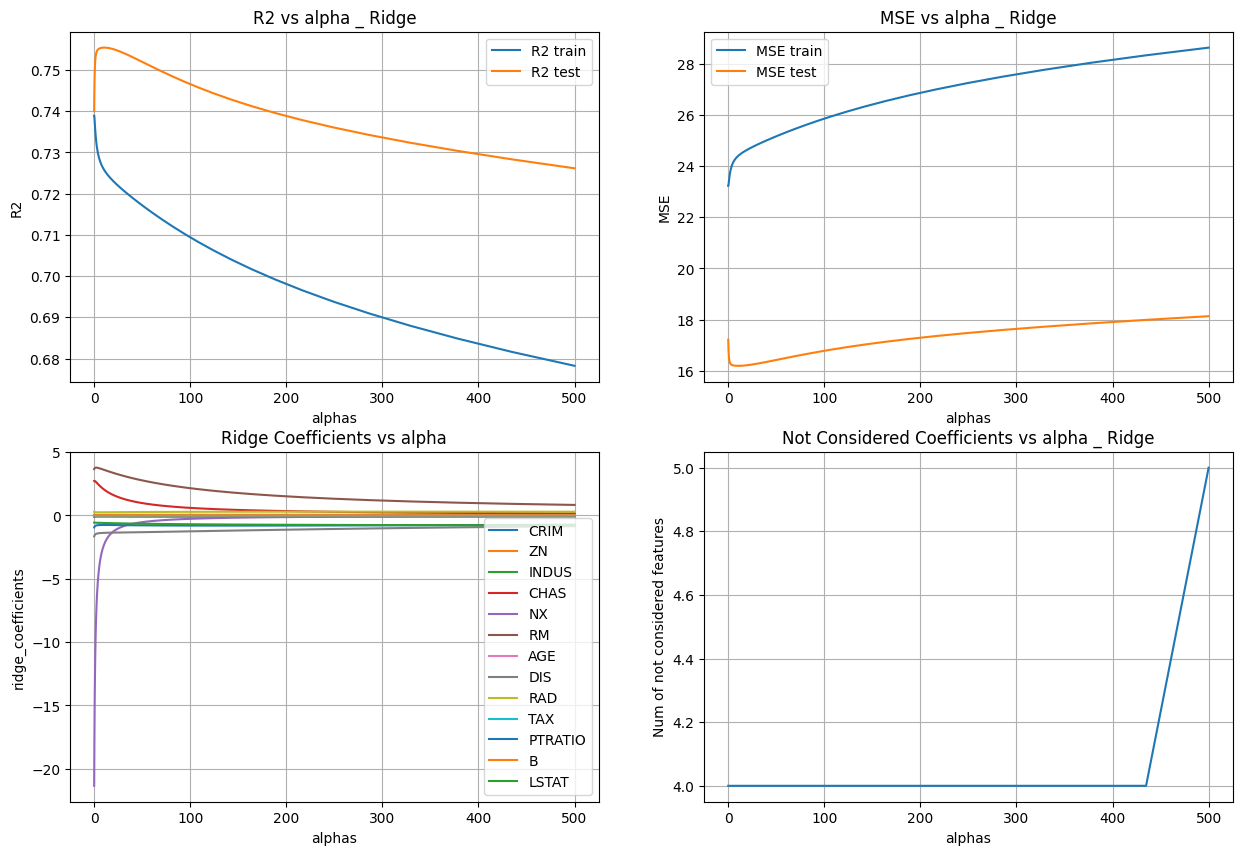

In [220]:
## Write your code here ##

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("R2 vs alpha _ Ridge")
plt.plot(alphas, ridge_r2_train, label="R2 train")
plt.plot(alphas,ridge_r2_test, label = "R2 test")
plt.xlabel("alphas")
plt.ylabel("R2")
# plt.xscale('log')
plt.grid()
plt.legend()

plt.subplot(222)
plt.title("MSE vs alpha _ Ridge")
plt.plot(alphas, ridge_mse_train, label="MSE train")
plt.plot(alphas,ridge_mse_test, label = "MSE test")
plt.xlabel("alphas")
plt.ylabel("MSE")
# plt.xscale('log')
plt.grid()
plt.legend()

plt.subplot(223)
plt.title("Ridge Coefficients vs alpha")
# plt.plot(coefficients,'o', label="linear regression coef")
for i in range(ridge_coefficients.shape[1]):
    plt.plot(alphas, ridge_coefficients[:, i], label=X_train.columns[i])
plt.xlabel("alphas")
plt.ylabel("ridge_coefficients")
# plt.xscale('log')
plt.grid()
plt.legend()

plt.subplot(224)
plt.title("Not Considered Coefficients vs alpha _ Ridge")
plt.plot(alphas, not_considered_features)
plt.xlabel("alphas")
plt.ylabel("Num of not considered features")
# plt.xscale('log')
plt.grid()
plt.show()


In [221]:
optimal_alpha_idx_ridge = np.argmin(ridge_mse_test)
optimal_alpha_ridge = alphas[optimal_alpha_idx_ridge]
optimal_mse_ridge = ridge_mse_test[optimal_alpha_idx_ridge]
optimal_r2_ridge = ridge_r2_test[optimal_alpha_idx_ridge]

print("Optimal Alpha:", optimal_alpha_ridge)
print("Optimal MSE on Test Set:", optimal_mse_ridge)
print("Optimal R2 on Test Set:", optimal_r2_ridge)
print("Optimal Coefficients:", ridge_coefficients[optimal_alpha_idx_ridge])

# Comparison with Linear Regression
print("\nComparison with Linear Regression:")
print("Linear Regression Test RMSE:", li_mse_test)
print("Linear Regression Test R2:", li_r2_test)

Optimal Alpha: 10.046165012825234
Optimal MSE on Test Set: 16.198776571377515
Optimal R2 on Test Set: 0.7554108087173174
Optimal Coefficients: [-0.08606282  0.05555178 -0.0382501   2.06207911 -2.34999345  3.60858885
 -0.0122674  -1.37271405  0.25147002 -0.01363728 -0.74933557  0.01012608
 -0.59135683]

Comparison with Linear Regression:
Linear Regression Test RMSE: 4.149887081038548
Linear Regression Test R2: 0.7399675157109997


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

In [222]:
## Write your code here ##


# Generate the alphas for Lasso
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Lists to store results for Lasso
lasso_coefficients = []
lasso_r2_train = []
lasso_r2_test = []
lasso_mse_train = []
lasso_mse_test = []
not_considered_features_lasso = []

# Train Lasso model for each alpha
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Make predictions
    lasso_y_pred_train = lasso_model.predict(X_train)
    lasso_y_pred_test = lasso_model.predict(X_test)

    # Calculate R^2 and store
    lasso_r2_train.append(r2_score(y_train, lasso_y_pred_train))
    lasso_r2_test.append(r2_score(y_test, lasso_y_pred_test))

    # Calculate RMSE and store
    mse_train = mean_squared_error(y_train, lasso_y_pred_train)
    mse_test = mean_squared_error(y_test, lasso_y_pred_test)
    lasso_mse_train.append(mse_train)
    lasso_mse_test.append(mse_test)

    # Store coefficients
    lasso_coefficients.append(lasso_model.coef_)
    threshold = 0.05

    num_not_considered_value = np.sum(np.abs(ridge_model.coef_) <= threshold)
    not_considered_features_lasso.append(num_not_considered_value)

# Convert list of coefficients to a numpy array for analysis
lasso_coefficients = np.array(lasso_coefficients)


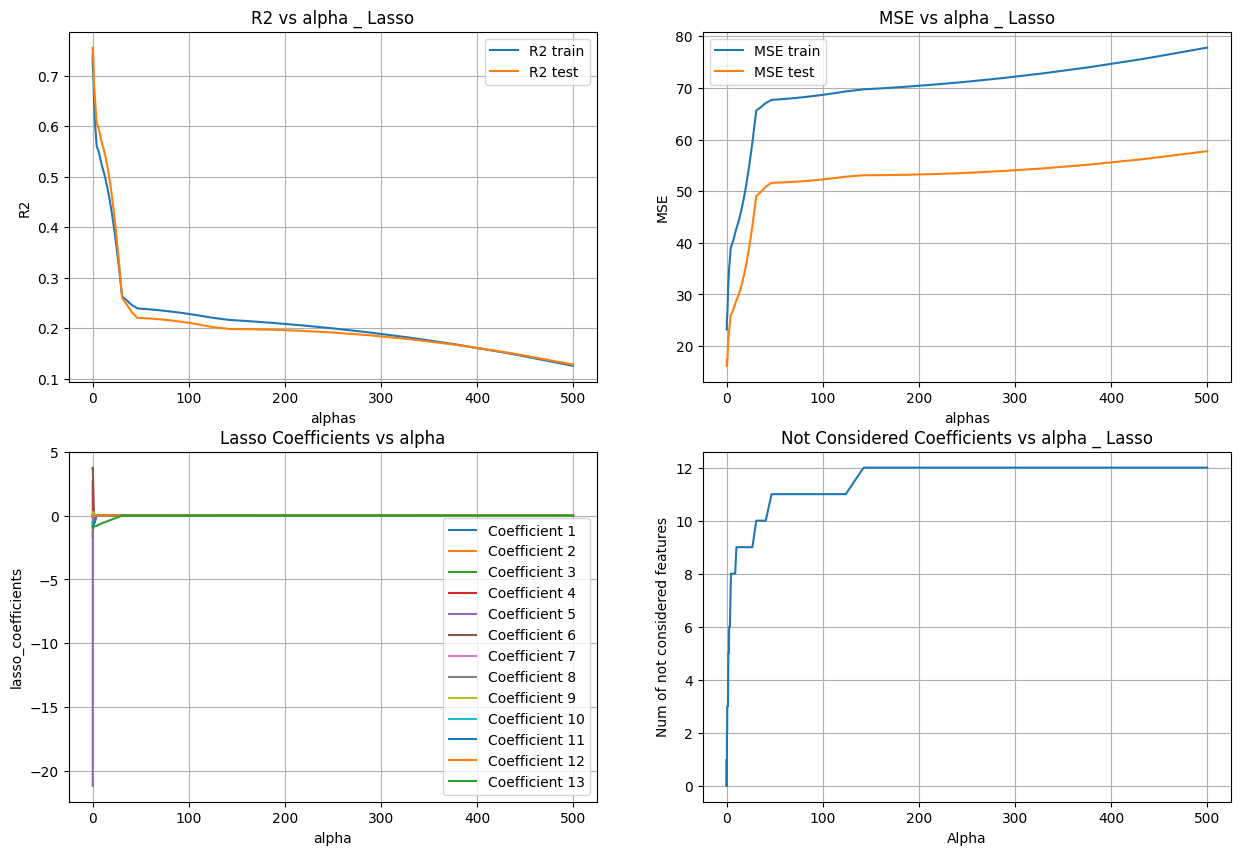

Optimal Alpha: 0.05748784976988678
Optimal RMSE on Test Set: 16.180811568828933
Optimal R2 on Test Set: 0.7556820665759209
Optimal Coefficients: [-0.08077557  0.05435957 -0.03132763  1.97519825 -2.3164547   3.75947123
 -0.01244559 -1.34264653  0.24353258 -0.01353462 -0.7349586   0.01020679
 -0.58342431]


In [223]:
# Plot Coefficients versus alpha
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("R2 vs alpha _ Lasso")
plt.plot(alphas, lasso_r2_train, label="R2 train")
plt.plot(alphas,lasso_r2_test, label = "R2 test")
plt.xlabel("alphas")
plt.ylabel("R2")
plt.grid()
plt.legend()

plt.subplot(222)
plt.title("MSE vs alpha _ Lasso")
plt.plot(alphas, lasso_mse_train, label="MSE train")
plt.plot(alphas,lasso_mse_test, label = "MSE test")
plt.xlabel("alphas")
plt.ylabel("MSE")
plt.grid()
plt.legend()

plt.subplot(223)
for i in range(lasso_coefficients.shape[1]):
    plt.plot(alphas, lasso_coefficients[:, i], label=f'Coefficient {i+1}')
# plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('lasso_coefficients')
plt.title('Lasso Coefficients vs alpha')
plt.grid()
plt.legend()

plt.subplot(224)
num_zero_coeffs = np.sum(lasso_coefficients == 0, axis=1)
plt.plot(alphas, num_zero_coeffs)
plt.xlabel('Alpha')
plt.ylabel('Num of not considered features')
plt.title('Not Considered Coefficients vs alpha _ Lasso')
plt.grid()
plt.show()

# Selecting the optimal alpha for Lasso
optimal_alpha_idx_lasso = np.argmin(lasso_mse_test)
optimal_alpha_lasso = alphas[optimal_alpha_idx_lasso]
print("Optimal Alpha:", optimal_alpha_lasso)
print("Optimal RMSE on Test Set:", lasso_mse_test[optimal_alpha_idx_lasso])
print("Optimal R2 on Test Set:", lasso_r2_test[optimal_alpha_idx_lasso])
print("Optimal Coefficients:", lasso_coefficients[optimal_alpha_idx_lasso])

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

### **Analysis:**

1.  **R^2 for test data versus training data ratio**:
    
    *   As the training data ratio increases, you should observe generally improving R2R^2R2 scores across all models, reflecting better generalization from more comprehensive training data.
    *   Linear regression might start showing signs of overfitting at low training data ratios compared to Ridge and Lasso, which include regularization components to mitigate this effect.
2.  **Selected α value versus training data ratio**:
    
    *   For Ridge and Lasso, the optimal alpha values should generally decrease as the training data ratio increases. This trend occurs because more data provides a better estimation of the true underlying data distribution, thus requiring less regularization.
    *   A higher training data ratio should correlate with a stronger confidence in the learned model, thus lowering the need for strong regularization (lower α).



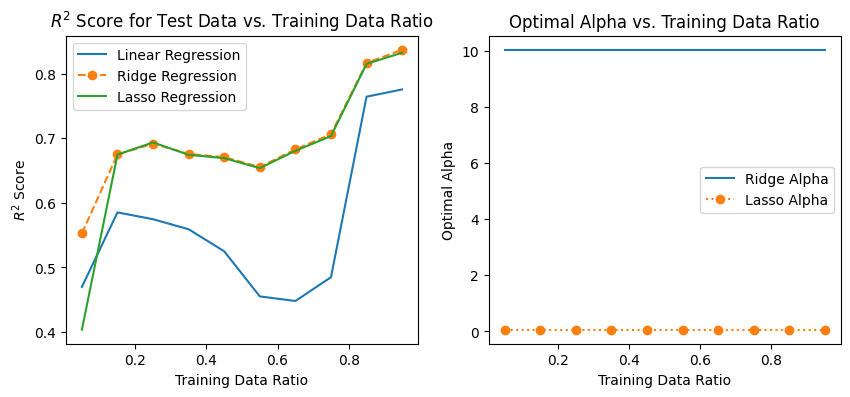

In [225]:
## Write you code here ##

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV

training_ratios = np.linspace(0.05, 0.95, 10)

r2_scores_linear = []
r2_scores_ridge = []
r2_scores_lasso = []
optimal_alpha_ridge_list = []
optimal_alpha_lasso_list = []

for ratio in training_ratios:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=ratio, random_state=100)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_y_pred_test = linear_model.predict(X_test)
    r2_scores_linear.append(r2_score(linear_y_pred_test, y_test))

    # Ridge Regression 
    ridge_model = Ridge(alpha = optimal_alpha_ridge)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred_test = ridge_model.predict(X_test)
    r2_scores_ridge.append(r2_score(y_test, ridge_y_pred_test))
    optimal_alpha_ridge_list.append(ridge_model.alpha)

    # Lasso Regression 
    lasso_model = Lasso(alpha = optimal_alpha_lasso)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred_test = lasso_model.predict(X_test)
    r2_scores_lasso.append(r2_score(y_test, lasso_y_pred_test))
    optimal_alpha_lasso_list.append(lasso_model.alpha)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(training_ratios, r2_scores_linear, label='Linear Regression')
plt.plot(training_ratios, r2_scores_ridge, 'o',linestyle = '--',label='Ridge Regression')
plt.plot(training_ratios, r2_scores_lasso, label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score for Test Data vs. Training Data Ratio')
plt.legend()


plt.subplot(122)
plt.plot(training_ratios, optimal_alpha_ridge_list, label='Ridge Alpha')
plt.plot(training_ratios, optimal_alpha_lasso_list,'o',linestyle = ':', label='Lasso Alpha')
plt.xlabel('Training Data Ratio')
plt.ylabel('Optimal Alpha')
plt.title('Optimal Alpha vs. Training Data Ratio')
plt.legend()
plt.show()


Lasso regression reduces the number of independent variables affecting the output. Ridge regression reduces the weight each independent variable has on the output.